<a href="https://colab.research.google.com/github/amerajat/AI07-garment_worker_productivity/blob/main/Copy_of_garment_worker_productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Garment Worker Productivity Data/garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


#Attribute Information:
1.date : Date in MM-DD-YYYY

2.day : Day of the Week

3.quarter : A portion of the month. A month was divided into four quarters

4.department : Associated department with the instance

5.teamno : Associated team number with the instance

6.noofworkers : Number of workers in each team

7.noofstylechange : Number of changes in the style of a particular product

8.targetedproductivity : Targeted productivity set by the Authority for each team for each day.

9.smv : Standard Minute Value, it is the allocated time for a task

10.wip : Work in progress. Includes the number of unfinished items for products

11.overtime : Represents the amount of overtime by each team in minutes

12.incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13.idletime : The amount of time when the production was interrupted due to several reasons

14.idlemen : The number of workers who were idle due to production interruption

15.actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.shape

(1197, 15)

### Idle_men, Idle_time and no_of_style_change has a high number of 0

In [ ]:
df['idle_men'].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

In [ ]:
df['idle_time'].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

In [ ]:
df['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

In [ ]:
high_zero_freq = ['idle_men','idle_time','no_of_style_change']
high_zero_freq

['idle_men', 'idle_time', 'no_of_style_change']

### Categorical Variable

In [ ]:
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )

In [ ]:
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [ ]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [ ]:
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [ ]:
df['team'].unique()

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4])

In [ ]:
categorical_variable = ['quarter','department','day','team']
categorical_variable

['quarter', 'department', 'day', 'team']

### Check and fill any NA value

In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df['wip'].fillna(int(df['wip'].mean()), inplace=True)
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

### Drop Column

In [ ]:
col_to_drop = high_zero_freq + ['date']
col_to_drop

['idle_men', 'idle_time', 'no_of_style_change', 'date']

In [ ]:

df.drop(columns= col_to_drop , inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,8.0,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,30.5,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,30.5,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,56.0,0.800382


### Encode

In [ ]:
encoded_columns = pd.get_dummies(df[categorical_variable], drop_first=True)
encoded_columns.head()

,team,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sewing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,11,0,0,0,0,1,0,0,1,0,0
3,12,0,0,0,0,1,0,0,1,0,0
4,6,0,0,0,0,1,0,0,1,0,0


### Normalize

In [ ]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,8.0,0.886500
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,30.5,0.800570
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,30.5,0.800570
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,sewing,Wednesday,10,0.75,2.90,1190.0,960,0,8.0,0.628333
1193,Quarter2,sewing,Wednesday,8,0.70,3.90,1190.0,960,0,8.0,0.625625
1194,Quarter2,sewing,Wednesday,7,0.65,3.90,1190.0,960,0,8.0,0.625625
1195,Quarter2,sewing,Wednesday,9,0.75,2.90,1190.0,1800,0,15.0,0.505889


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
column_scalling = [ 'smv', 'wip', 'over_time', 'incentive', 'no_of_workers']
column_scalling

['smv', 'wip', 'over_time', 'incentive', 'no_of_workers']

In [ ]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df[column_scalling])


In [ ]:
for i in range(len(column_scalling)):
    df[column_scalling[i]] = scalled[:,i]

In [ ]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,8,0.80,0.450252,0.047631,0.273148,0.027222,0.655172,0.940725
1,Quarter1,finishing,Thursday,1,0.75,0.020132,0.051179,0.037037,0.000000,0.068966,0.886500
2,Quarter1,sewing,Thursday,11,0.80,0.164731,0.041575,0.141204,0.013889,0.327586,0.800570
3,Quarter1,sewing,Thursday,12,0.80,0.164731,0.041575,0.141204,0.013889,0.327586,0.800570
4,Quarter1,sewing,Thursday,6,0.80,0.445219,0.050314,0.074074,0.013889,0.620690,0.800382
...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,sewing,Wednesday,10,0.75,0.000000,0.051179,0.037037,0.000000,0.068966,0.628333
1193,Quarter2,sewing,Wednesday,8,0.70,0.019357,0.051179,0.037037,0.000000,0.068966,0.625625
1194,Quarter2,sewing,Wednesday,7,0.65,0.019357,0.051179,0.037037,0.000000,0.068966,0.625625
1195,Quarter2,sewing,Wednesday,9,0.75,0.000000,0.051179,0.069444,0.000000,0.149425,0.505889


In [ ]:
df.drop(categorical_variable, axis=1, inplace=True)
df2 = pd.concat([encoded_columns,df],axis=1)
df2.head()




,team,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sewing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
0,8,0,0,0,0,1,0,0,1,0,0,0.80,0.450252,0.047631,0.273148,0.027222,0.655172,0.940725
1,1,0,0,0,0,0,0,0,1,0,0,0.75,0.020132,0.051179,0.037037,0.000000,0.068966,0.886500
2,11,0,0,0,0,1,0,0,1,0,0,0.80,0.164731,0.041575,0.141204,0.013889,0.327586,0.800570
3,12,0,0,0,0,1,0,0,1,0,0,0.80,0.164731,0.041575,0.141204,0.013889,0.327586,0.800570
4,6,0,0,0,0,1,0,0,1,0,0,0.80,0.445219,0.050314,0.074074,0.013889,0.620690,0.800382


In [ ]:
df2.shape

(1197, 18)

#Split and Train

In [ ]:
z = ["actual_productivity"]
x = df2.drop(z,axis=1)
y = df2["actual_productivity"]
x.head()

,team,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sewing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,targeted_productivity,smv,wip,over_time,incentive,no_of_workers
0,8,0,0,0,0,1,0,0,1,0,0,0.80,0.450252,0.047631,0.273148,0.027222,0.655172
1,1,0,0,0,0,0,0,0,1,0,0,0.75,0.020132,0.051179,0.037037,0.000000,0.068966
2,11,0,0,0,0,1,0,0,1,0,0,0.80,0.164731,0.041575,0.141204,0.013889,0.327586
3,12,0,0,0,0,1,0,0,1,0,0,0.80,0.164731,0.041575,0.141204,0.013889,0.327586
4,6,0,0,0,0,1,0,0,1,0,0,0.80,0.445219,0.050314,0.074074,0.013889,0.620690


In [ ]:
y.head()

0    0.940725
1    0.886500
2    0.800570
3    0.800570
4    0.800382
Name: actual_productivity, dtype: float64

In [ ]:
x.shape,y.shape

((1197, 17), (1197,))

In [ ]:
from sklearn.model_selection import train_test_split
SEED=42
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state=SEED)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((837, 17), (360, 17), (837,), (360,))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses, applications

In [ ]:
number_input = x_train.shape[-1]
#number_output = y_train.shape[-1]
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=number_input)) 
model.add(tf.keras.layers.Dense(4096,activation='relu'))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 4096)              73728     
                                                                 
 dense_33 (Dense)            (None, 512)               2097664   
                                                                 
 dense_34 (Dense)            (None, 128)               65664     
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 8)                

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics =['mae'])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 100

history = model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

Epoch 1/100
27/27 [==============================] - 1s 10ms/step - loss: 0.4369 - mae: 0.6127 - val_loss: 0.2188 - val_mae: 0.3975
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0845 - mae: 0.2284 - val_loss: 0.0421 - val_mae: 0.1593
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0354 - mae: 0.1473 - val_loss: 0.0301 - val_mae: 0.1323
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0280 - mae: 0.1315 - val_loss: 0.0276 - val_mae: 0.1258
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0263 - mae: 0.1281 - val_loss: 0.0261 - val_mae: 0.1139
Epoch 6/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0246 - mae: 0.1223 - val_loss: 0.0267 - val_mae: 0.1130
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 0.0239 - mae: 0.1183 - val_loss: 0.0256 - val_mae: 0.1127
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 0.0253 - 

In [ ]:
result = model.evaluate(x_test,y_test,batch_size=BATCH_SIZE)
print(f"Test loss = {result[0]}")
print(f"Test MAE = {result[1]}")



12/12 [==============================] - 0s 3ms/step - loss: 0.0268 - mae: 0.1215
Test loss = 0.026789791882038116
Test MAE = 0.1215185821056366


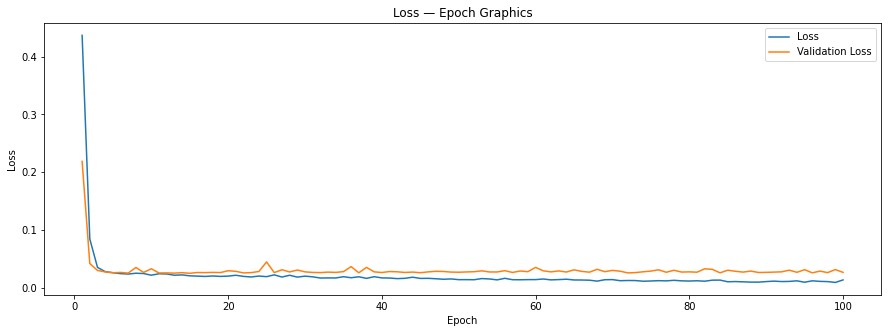

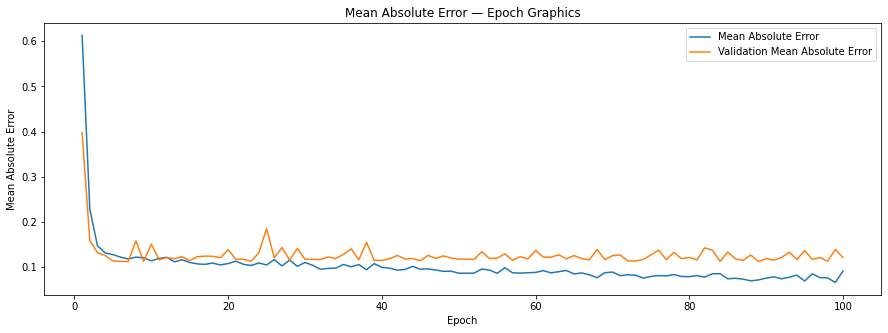

In [ ]:
import matplotlib.pyplot as plt
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()
figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error — Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.plot(range(1, len(history.history['val_mae']) + 1), history.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()



In [ ]:
predictions = model.predict(x_test)
pred_vs_label = np.concatenate((predictions,np.expand_dims(y_test, axis=1)),axis=1)
pred_vs_label

array([[0.51319706, 0.26821429],
       [0.72043318, 0.80035877],
       [0.7204895 , 0.68106061],
       [0.42690492, 0.325     ],
       [0.62052828, 0.66760417],
       [0.68824297, 0.80098039],
       [0.41954643, 0.76884722],
       [0.3517549 , 0.76884722],
       [0.60420871, 0.65041673],
       [0.68397373, 0.75039551],
       [0.75594556, 0.70039815],
       [0.99003404, 0.86167901],
       [0.89411676, 0.80031864],
       [0.57909793, 0.81640625],
       [0.78630245, 0.90014481],
       [0.72893059, 0.93532197],
       [0.81481415, 1.00034493],
       [0.70637172, 0.60044751],
       [0.55400568, 0.71441049],
       [0.73277003, 0.90032111],
       [0.95751619, 1.00006579],
       [0.58619577, 0.70018458],
       [0.91354972, 0.89306667],
       [0.8451165 , 0.72734954],
       [0.76012057, 0.83      ],
       [0.61865616, 0.49999889],
       [0.5554679 , 0.994375  ],
       [0.85747159, 1.00023041],
       [0.6117568 , 0.456875  ],
       [0.76073611, 0.5375    ],
       [0.

In [ ]:
from sklearn import metrics
fit = np.polyfit(y_test, predictions, 1)
fit


array([[0.35037324],
       [0.43845752]])

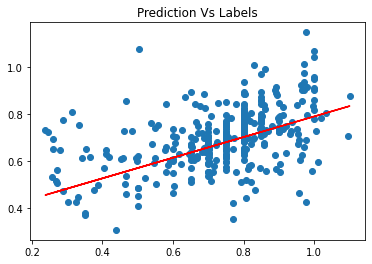

<Figure size 432x288 with 0 Axes>

In [ ]:
y_line = fit[0] + fit[1] * y_test

plt.scatter(y_test, predictions)
plt.plot(y_test, y_line, 'r')
plt.title('Prediction Vs Labels')
plt.figure()
plt.show()

